In [1]:
%pip install requests bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import requests 
from bs4 import BeautifulSoup

In [4]:
base_url='https://www.airlinequality.com/airline-reviews/british-airways'

In [5]:
data=requests.get(base_url)

In [6]:
data

<Response [200]>

In [7]:
data.content

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>British Airways Customer Reviews - SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequal

In [8]:
bs=BeautifulSoup(data.content)

In [9]:
bs

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>British Airways Customer Reviews - SKYTRAX</title>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<!-- icons & favicons -->
<link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-icon-touch.png" rel="apple-tou

### creating the function to fetch all data

In [10]:
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [11]:
import pandas as pd
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  ✅ Trip Verified |  I flew to LHR from ATH in C...
1  ✅ Trip Verified |  I like the British Airways ...
2  ✅ Trip Verified |  I have come to boarding and...
3  ✅ Trip Verified | Stinking nappies being chang...
4  ✅ Trip Verified | Worst service ever. Lost bag...

In [12]:
df.to_csv("BA_reviews.csv")


In [13]:
df2= pd.read_csv('BA_reviews.csv')

In [14]:
df2.head()

Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |  I flew to LHR from ATH in C...
1           1  ✅ Trip Verified |  I like the British Airways ...
2           2  ✅ Trip Verified |  I have come to boarding and...
3           3  ✅ Trip Verified | Stinking nappies being chang...
4           4  ✅ Trip Verified | Worst service ever. Lost bag...

In [15]:
i=0
for i in range(1000):
    df2[['veri','text']]= df2['reviews'][i].split('|')
    

In [16]:
df2['reviews'].nunique()


1000

In [17]:
df2.head()

Unnamed: 0                                            reviews  \
0           0  ✅ Trip Verified |  I flew to LHR from ATH in C...   
1           1  ✅ Trip Verified |  I like the British Airways ...   
2           2  ✅ Trip Verified |  I have come to boarding and...   
3           3  ✅ Trip Verified | Stinking nappies being chang...   
4           4  ✅ Trip Verified | Worst service ever. Lost bag...   

               veri                                               text  
0  ✅ Trip Verified     Doha to London Heathrow. Flight on time, not...  
1  ✅ Trip Verified     Doha to London Heathrow. Flight on time, not...  
2  ✅ Trip Verified     Doha to London Heathrow. Flight on time, not...  
3  ✅ Trip Verified     Doha to London Heathrow. Flight on time, not...  
4  ✅ Trip Verified     Doha to London Heathrow. Flight on time, not...

In [18]:
df2['reviews']

0      ✅ Trip Verified |  I flew to LHR from ATH in C...
1      ✅ Trip Verified |  I like the British Airways ...
2      ✅ Trip Verified |  I have come to boarding and...
3      ✅ Trip Verified | Stinking nappies being chang...
4      ✅ Trip Verified | Worst service ever. Lost bag...
                             ...                        
995    ✅ Trip Verified |  London to Chicago. Could it...
996    ✅ Trip Verified |  Prague to London Heathrow. ...
997    ✅ Trip Verified |  London City to Florence. My...
998    ✅ Trip Verified |  London to Johannesburg. Sin...
999    ✅ Trip Verified |  Doha to London Heathrow. Fl...
Name: reviews, Length: 1000, dtype: object

In [19]:
df2=df2.drop(columns=['text','Unnamed: 0'])

In [20]:
df2.head()

reviews              veri
0  ✅ Trip Verified |  I flew to LHR from ATH in C...  ✅ Trip Verified 
1  ✅ Trip Verified |  I like the British Airways ...  ✅ Trip Verified 
2  ✅ Trip Verified |  I have come to boarding and...  ✅ Trip Verified 
3  ✅ Trip Verified | Stinking nappies being chang...  ✅ Trip Verified 
4  ✅ Trip Verified | Worst service ever. Lost bag...  ✅ Trip Verified

In [21]:
df2['reviews']= df2['reviews'].str.replace('Trip Verified','')
df2['reviews']= df2['reviews'].str.replace('Not Verified','')

In [22]:
df2['reviews']

0      ✅  |  I flew to LHR from ATH in Club Europe wi...
1      ✅  |  I like the British Airways World Travell...
2      ✅  |  I have come to boarding and my cabin lug...
3      ✅  | Stinking nappies being changed in busines...
4      ✅  | Worst service ever. Lost baggage because ...
                             ...                        
995    ✅  |  London to Chicago. Could it get any wors...
996    ✅  |  Prague to London Heathrow. Very disappoi...
997    ✅  |  London City to Florence. My flight was a...
998    ✅  |  London to Johannesburg. Since the aircra...
999    ✅  |  Doha to London Heathrow. Flight on time,...
Name: reviews, Length: 1000, dtype: object

## Removing punctuations marks

In [23]:
import re

In [24]:
def text_pre(st):
    pre=st.lower()
    pre=re.sub('[^a-z0-9 ]','',pre)
    return pre

In [25]:
df2['reviews']=df2['reviews'].apply(text_pre)
df2['veri']=df2['veri'].apply(text_pre)

In [40]:
df2.head()
df3=df2

In [46]:
a=[]

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
df2['baba']= le.fit_transform(df2['veri'])

In [53]:
df2.head()

reviews             veri  baba
0    i flew to lhr from ath in club europe with b...   trip verified      0
1      i like the british airways world traveller...   trip verified      0
2      i have come to boarding and my cabin lugga...   trip verified      0
3     stinking nappies being changed in business ...   trip verified      0
4     worst service ever lost baggage because of ...   trip verified      0

In [48]:
for i in df3['veri']:
    a.append(i)

In [49]:
a

[' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',
 ' trip verified ',


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english',ngram_range=(2,2))

In [28]:
x=tfidf.fit_transform(df2['reviews'])


In [29]:
tfidf.vocabulary_.items()

dict_items([('flew lhr', 19185), ('lhr ath', 27913), ('ath club', 4676), ('club europe', 11033), ('europe ba641', 17309), ('ba641 dec', 5888), ('dec 31', 13701), ('31 transfer', 800), ('transfer jal', 47998), ('jal flight', 26116), ('flight tokyo', 19989), ('tokyo great', 47457), ('great expectations', 22669), ('expectations services', 17692), ('services enjoy', 42612), ('enjoy board', 16955), ('board partly', 7230), ('partly flight', 34165), ('flight time', 19983), ('time hours', 47028), ('hours seat', 24683), ('seat configuration', 41100), ('configuration club', 11860), ('europe typical', 17360), ('typical european', 48852), ('european business', 17366), ('business class', 8192), ('class middle', 10669), ('middle seat', 30792), ('seat afterward', 41048), ('afterward board', 2008), ('board remembering', 7241), ('remembering took', 39006), ('took route', 47737), ('route ba', 40009), ('ba 30', 5288), ('30 years', 781), ('years ago', 52089), ('ago got', 2115), ('got feel', 22496), ('feel

In [30]:
tfidf.vocabulary_

{'flew lhr': 19185,
 'lhr ath': 27913,
 'ath club': 4676,
 'club europe': 11033,
 'europe ba641': 17309,
 'ba641 dec': 5888,
 'dec 31': 13701,
 '31 transfer': 800,
 'transfer jal': 47998,
 'jal flight': 26116,
 'flight tokyo': 19989,
 'tokyo great': 47457,
 'great expectations': 22669,
 'expectations services': 17692,
 'services enjoy': 42612,
 'enjoy board': 16955,
 'board partly': 7230,
 'partly flight': 34165,
 'flight time': 19983,
 'time hours': 47028,
 'hours seat': 24683,
 'seat configuration': 41100,
 'configuration club': 11860,
 'europe typical': 17360,
 'typical european': 48852,
 'european business': 17366,
 'business class': 8192,
 'class middle': 10669,
 'middle seat': 30792,
 'seat afterward': 41048,
 'afterward board': 2008,
 'board remembering': 7241,
 'remembering took': 39006,
 'took route': 47737,
 'route ba': 40009,
 'ba 30': 5288,
 '30 years': 781,
 'years ago': 52089,
 'ago got': 2115,
 'got feel': 22496,
 'feel relaxed': 18695,
 'relaxed unobtrusive': 38948,
 'u

In [31]:
m=list(tfidf.vocabulary_.values())

In [32]:
m.sort()

In [33]:
m

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [34]:
res= { key : value for key,value in sorted(tfidf.vocabulary_.items(),reverse=True)[0:50]}
res

{'zusammenschluss geflogen': 52290,
 'zurich zrh': 52289,
 'zurich transfer': 52288,
 'zurich time': 52287,
 'zurich old': 52286,
 'zurich london': 52285,
 'zurich fly': 52284,
 'zurich ba8': 52283,
 'zurich airport': 52282,
 'zum glck': 52281,
 'zuletzt ist': 52280,
 'zrhlhr impossible': 52279,
 'zrhlhr gvalhr': 52278,
 'zrh london': 52277,
 'zoo taking': 52276,
 'zoo staff': 52275,
 'zoo 2pm': 52274,
 'zones older': 52273,
 'zones carried': 52272,
 'zones applicable': 52271,
 'zone heathrow': 52270,
 'zone given': 52269,
 'zone club': 52268,
 'zone announced': 52267,
 'zone 6d': 52266,
 'zip suitcase': 52265,
 'zip better': 52264,
 'zimbabwe loss': 52263,
 'zilch ba': 52262,
 'zhrlhr miles': 52261,
 'zero terms': 52260,
 'zero stars': 52259,
 'zero room': 52258,
 'zero responsibility': 52257,
 'zero realise': 52256,
 'zero positive': 52255,
 'zero notice': 52254,
 'zero information': 52253,
 'zero help': 52252,
 'zero feeling': 52251,
 'zero faith': 52250,
 'zero empathy': 52249,
 'z

In [35]:
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
tfidf_weights = [(word, x.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

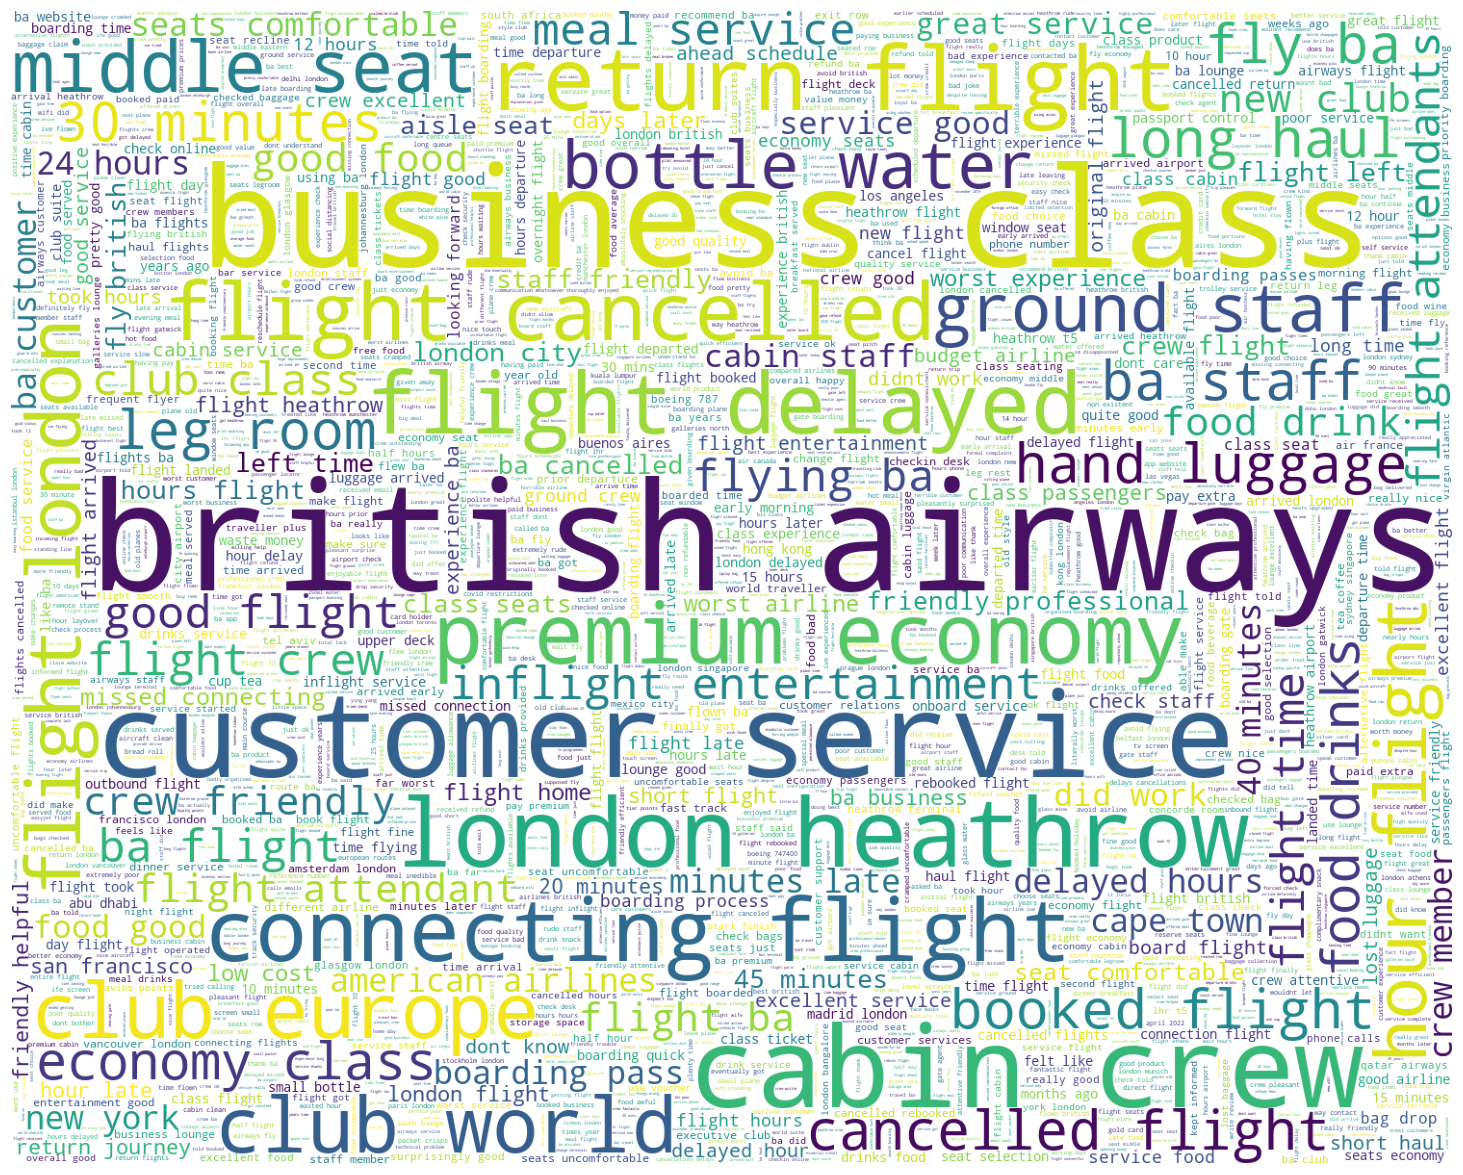

In [38]:
w = WordCloud(width = 1500, height=1200, mode='RGBA', background_color = 'white', max_words=2000
).fit_words(dict(tfidf_weights))
plt.figure(figsize = (20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')

In [39]:
tfidf.vocabulary_.items()

dict_items([('flew lhr', 19185), ('lhr ath', 27913), ('ath club', 4676), ('club europe', 11033), ('europe ba641', 17309), ('ba641 dec', 5888), ('dec 31', 13701), ('31 transfer', 800), ('transfer jal', 47998), ('jal flight', 26116), ('flight tokyo', 19989), ('tokyo great', 47457), ('great expectations', 22669), ('expectations services', 17692), ('services enjoy', 42612), ('enjoy board', 16955), ('board partly', 7230), ('partly flight', 34165), ('flight time', 19983), ('time hours', 47028), ('hours seat', 24683), ('seat configuration', 41100), ('configuration club', 11860), ('europe typical', 17360), ('typical european', 48852), ('european business', 17366), ('business class', 8192), ('class middle', 10669), ('middle seat', 30792), ('seat afterward', 41048), ('afterward board', 2008), ('board remembering', 7241), ('remembering took', 39006), ('took route', 47737), ('route ba', 40009), ('ba 30', 5288), ('30 years', 781), ('years ago', 52089), ('ago got', 2115), ('got feel', 22496), ('feel